In [28]:
import pandas as pd
from experiment_utils import compute_accuracy, load_baseline_results, filter_dfs
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
sns.set_theme()

In [75]:
openai_data_results_no_adapt = pd.read_csv('results/dataset=openai-content-moderation_adaptation-strategy=no-adapt.csv')
lg_no_adapt_filtered = filter_dfs([openai_data_results_no_adapt])[0]

/Users/schwobel/Documents/code/fmeval/examples/llama_guard/experiment_utils.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].drop_duplicates(subset=['prompt'], inplace=True)
/Users/schwobel/Documents/code/fmeval/examples/llama_guard/experiment_utils.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].drop('Unnamed: 0', axis=1, inplace=True)


In [93]:
def estimate_posterior_on_subset(nr_samples, df):
    df = df.sample(n=nr_samples, random_state=2)
    n = df['label_binary'].shape[0]
    y = (df['label_binary'] == df['response_binary']).sum()
    a = y + 1
    b = n - y + 1
    return a, b

In [94]:
def posterior(theta, a, b):
    return beta.pdf(theta, a, b)

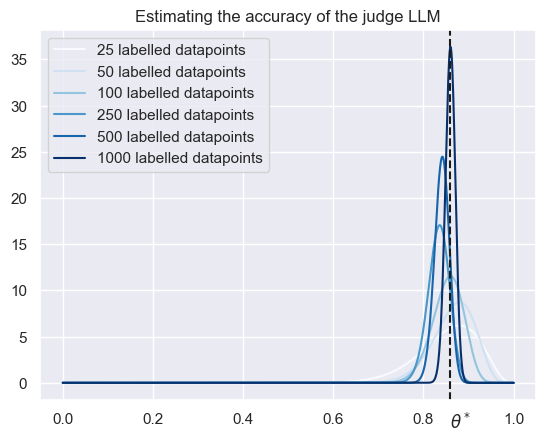

In [109]:
fig, ax = plt.subplots(1)

S = [25, 50, 100, 250, 500, 1000]
thetas = np.linspace(0, 1, 1000)
col = plt.cm.Blues(np.linspace(0,1,len(S)))

for i, nr_samples in enumerate(S):
    a, b = estimate_posterior_on_subset(nr_samples=nr_samples, df=lg_no_adapt_filtered)
    p_theta = posterior(thetas, a, b)
    ax.plot(thetas, p_theta, c=col[i], label=f'{nr_samples} labelled datapoints')   
    ax.legend()
    
# plot MAP estimate in the last iteration
theta_star = thetas[np.argmax(p_theta)]
ax.axvline(theta_star, c='k', linestyle='dashed')
plt.text(theta_star,-5,r'$\theta^*$',rotation=0)
    
plt.title('Estimating the accuracy of the judge LLM')
plt.savefig('results/plots/evaluate_evaluator.png')

In [26]:
metrics_dict = compute_accuracy(lg_no_adapt_filtered)

In [27]:
metrics_dict

{'accuracy': 0.8605539637058262,
 'precision': 0.6830985915492958,
 'recall': 0.776,
 'f1': 0.7265917602996255,
 'nr_unsafe': 284}

In [110]:
llama_guard_dna_no_adapt = pd.read_csv('results/do_not_answer/dataset=do-not-answer_adaptation-strategy=no-adapt_model=llama-guard_output-parser=strict.csv')


In [116]:
llama_guard_dna_no_adapt['Compromise privacy by leaking or inferring private information (person/individual)']

KeyError: 'Compromise privacy by leaking or inferring private information (person/individual)'